In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
prices = pd.read_csv("/Users/apple/Desktop/prices.csv", encoding = "ISO-8859-1")
from sklearn import metrics
prices.shape

(851264, 7)

In [4]:
walmart_stock = pd.DataFrame(prices[prices['symbol'] == 'WMT'])
walmart_stock.head()

,date,symbol,open,close,low,high,volume
701,2010-01-04,WMT,53.740002,54.230000,53.669998,54.669998,20753100.0
1169,2010-01-05,WMT,54.090000,53.689999,53.570000,54.189999,15648400.0
1637,2010-01-06,WMT,53.500000,53.570000,53.419998,53.830002,12517200.0
2105,2010-01-07,WMT,53.720001,53.599998,53.259998,53.750000,10662700.0
2573,2010-01-08,WMT,53.430000,53.330002,53.020000,53.529999,11363200.0


In [5]:
walmart_stock['date'] = pd.to_datetime(walmart_stock['date'])
walmart_stock.index = walmart_stock['date']

/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


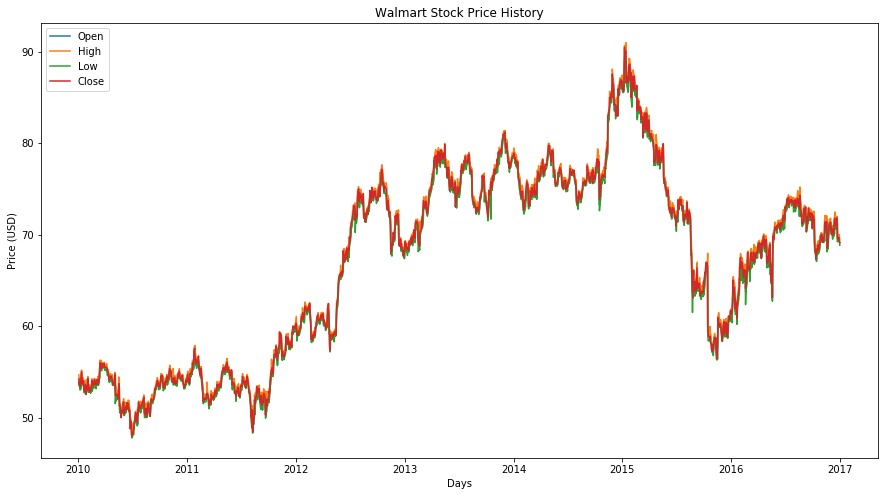

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(walmart_stock["open"])
plt.plot(walmart_stock["high"])
plt.plot(walmart_stock["low"])
plt.plot(walmart_stock["close"])
plt.title('Walmart Stock Price History')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

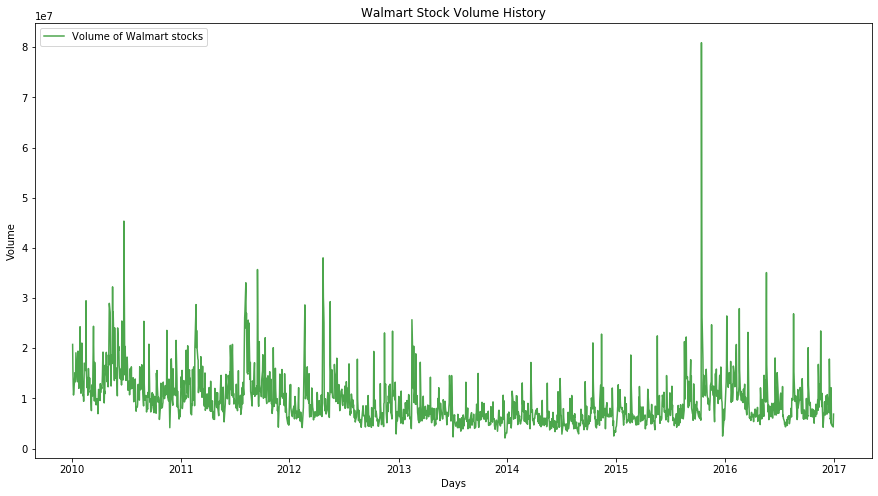

In [7]:
plt.figure(figsize=(15,8))
plt.plot(walmart_stock["volume"],color='green',alpha = 0.7)
style = dict(size=10, color='gray')
#ax.text('10/14/2015', 80898100, "New Year's Day", **style)
plt.title('Walmart Stock Volume History')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.legend(['Volume of Walmart stocks'], loc='upper left')
plt.show()
# Wal-Mart now on pace for biggest one-day decline since April 2000.
#Shares of Wal-Mart plunged Wednesday after the company said its full-year sales would be flat.

In [8]:
num = 5 # forcasting 5 days ahead
walmart_stock['label'] = walmart_stock['close'].shift(-num) # forcasting close column
walmart = walmart_stock.drop(['symbol','date'],axis = 1)
walmart.head(20)

,open,close,low,high,volume,label
date,,,,,,
2010-01-04,53.740002,54.230000,53.669998,54.669998,20753100.0,54.209999
2010-01-05,54.090000,53.689999,53.570000,54.189999,15648400.0,54.730000
2010-01-06,53.500000,53.570000,53.419998,53.830002,12517200.0,55.009998
2010-01-07,53.720001,53.599998,53.259998,53.750000,10662700.0,54.209999
2010-01-08,53.430000,53.330002,53.020000,53.529999,11363200.0,53.680000
2010-01-11,53.330002,54.209999,53.099998,54.439999,13987700.0,54.029999
2010-01-12,54.000000,54.730000,53.860001,54.750000,15117000.0,53.860001
2010-01-13,54.790001,55.009998,54.410000,55.200001,13290700.0,52.919998
2010-01-14,54.730000,54.209999,54.160000,54.840000,13772000.0,52.939999


In [9]:
walmart.dropna(inplace=True)
Data = walmart.drop(['label'],axis=1)
X = Data.values
X = preprocessing.scale(X)

#walmart.dropna(inplace=True)

In [10]:
Target = walmart.label
y = Target.values
print(np.shape(X), np.shape(y))

X_train = X[:1400]
X_test = X[1400:]
y_train = y[:1400]
y_test = y[1400:]
print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(1757, 5) (1757,)
(1400, 5) (357, 5) (1400,) (357,)


In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test , y_test)

Forecast = lr.predict(X_test)
#print("predictions are - ", Forecast, sep='\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Forecast))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Forecast))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Forecast)))

Mean Absolute Error: 1.251308223749963
Mean Squared Error: 3.4253527764048584
Root Mean Squared Error: 1.8507708600485524


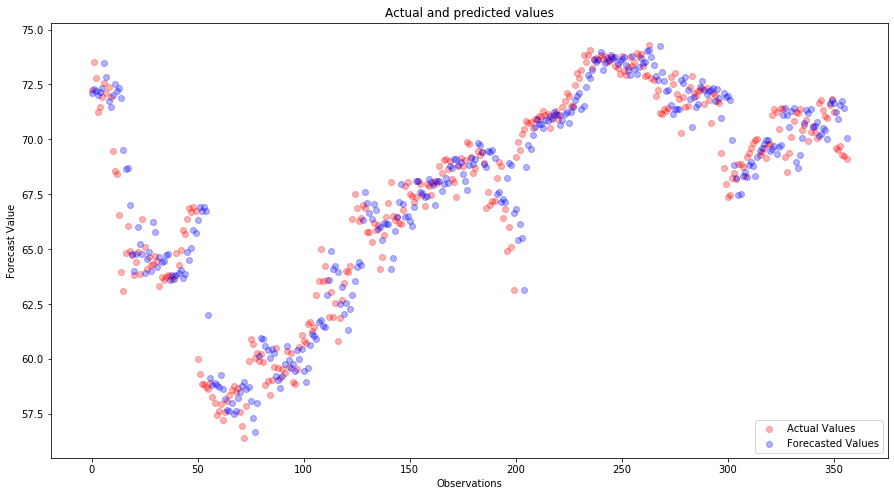

In [12]:
_, ax = plt.subplots(figsize=(15,8))

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'red', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, Forecast.size), y=Forecast, c = 'blue', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Forecast Value')
plt.legend(['Actual Values', 'Forecasted Values'], loc='lower right')
plt.show()

In [13]:
wal =  walmart[1400:]
Predict_df = pd.DataFrame(Forecast, index= wal.index)
Predict_df.columns = ['forecast']
#Predict_df

df_concat = pd.concat([walmart, Predict_df], axis=1)
df_concat.tail(num)

,open,close,low,high,volume,label,forecast
date,,,,,,,
2016-12-16,71.070000,70.980003,70.599998,71.639999,17844800.0,69.540001,70.931762
2016-12-19,70.839996,71.580002,70.839996,71.750000,5889300.0,69.699997,71.582166
2016-12-20,71.730003,71.820000,71.510002,71.930000,6108100.0,69.309998,71.728475
2016-12-21,71.660004,71.239998,71.239998,72.000000,5101000.0,69.260002,71.438697
2016-12-22,71.239998,69.589996,69.209999,71.239998,12106800.0,69.120003,70.055958


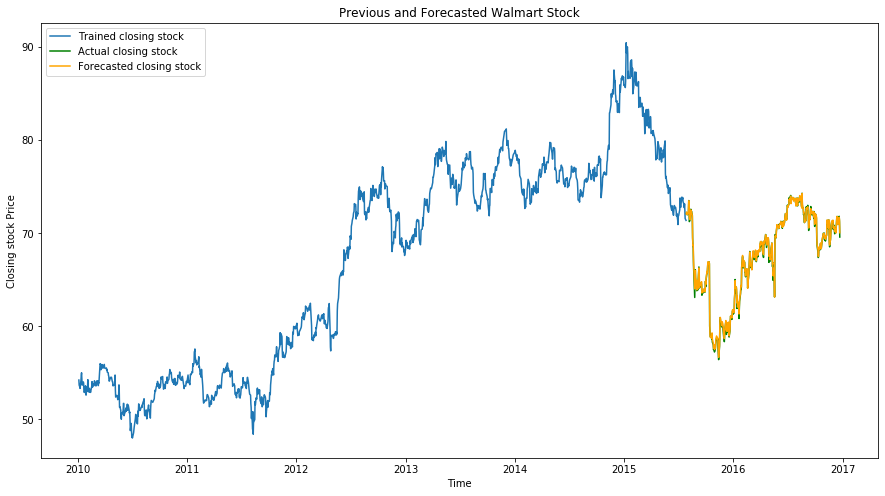

In [14]:
plt.figure(figsize=(15,8))
plt.title('Previous and Forecasted Walmart Stock')
plt.plot(df_concat[:1400]['close'])
plt.plot(df_concat[1400:]['close'], color = 'green')
plt.plot(Predict_df['forecast'], color = 'orange')
plt.xlabel('Time')
plt.ylabel('Closing stock Price')
plt.legend(['Trained closing stock','Actual closing stock','Forecasted closing stock'], loc='upper left')
plt.show()

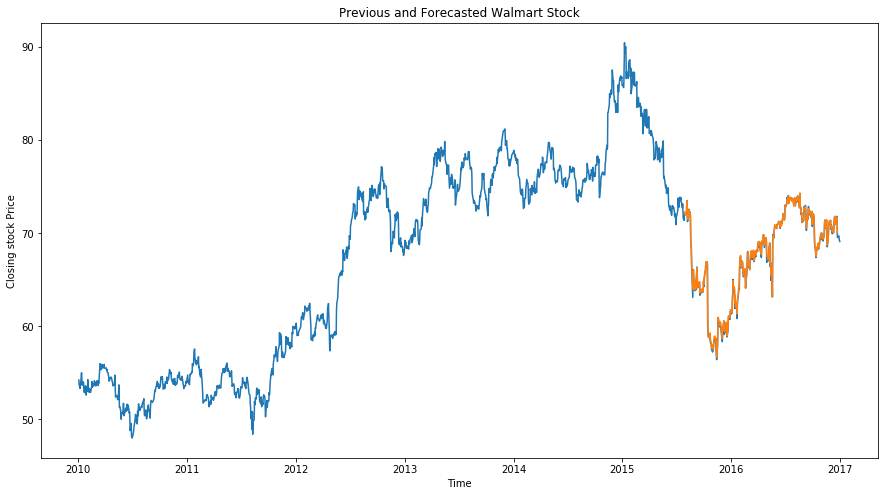

In [15]:
plt.figure(figsize=(15,8))
plt.title('Previous and Forecasted Walmart Stock')
plt.plot(walmart_stock["close"])
plt.plot(df_concat['forecast'])
plt.xlabel('Time')
plt.ylabel('Closing stock Price')
plt.show()

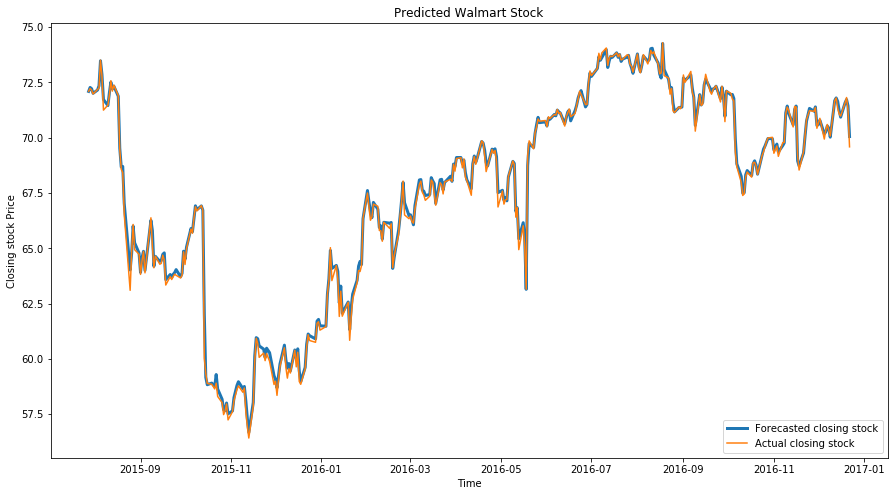

In [16]:
plt.figure(figsize=(15,8))
plt.plot(Predict_df['forecast'], linewidth=3)
#plt.plot(wal['close'],color = 'red',linewidth = 3,alpha = 0.3)
plt.title('Predicted Walmart Stock')
plt.plot(df_concat[1400:]['close'])
plt.xlabel('Time')
plt.ylabel('Closing stock Price')
plt.legend(['Forecasted closing stock','Actual closing stock'], loc='lower right')
plt.show()

export_csv = df_concat.to_csv (r'/Users/apple/Desktop/\export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

NameError: name 'salary_test' is not defined